<a href="https://colab.research.google.com/github/JSJeong-me/KOSA_Vision_Exercise/blob/main/yolo-cv-signal-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://github.com/ultralytics/yolov5/issues/36

In [2]:
#pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [3]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
#img = './traffic-signal-1.jpg'
img = cv2.imread('./traffic-signal-1.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)

img.shape

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-28 torch 1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


(1170, 1200, 3)

In [5]:
model.conf = 0.25  # confidence threshold (0-1)
model.iou = 0.45  # NMS IoU threshold (0-1)
model.classes =[2, 9]  # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs

# Inference
results = model(img, size=920)

In [6]:
from io import BytesIO
from PIL import Image
import base64

In [7]:
results.imgs # array of original images (as np array) passed to model for inference
results.render()  # updates results.imgs with boxes and labels
for img in results.imgs:
    buffered = BytesIO()
    img_base64 = Image.fromarray(img)
    img_base64.save(buffered, format="JPEG")
    #print(base64.b64encode(buffered.getvalue()).decode('utf-8'))  # base64 encoded image with results

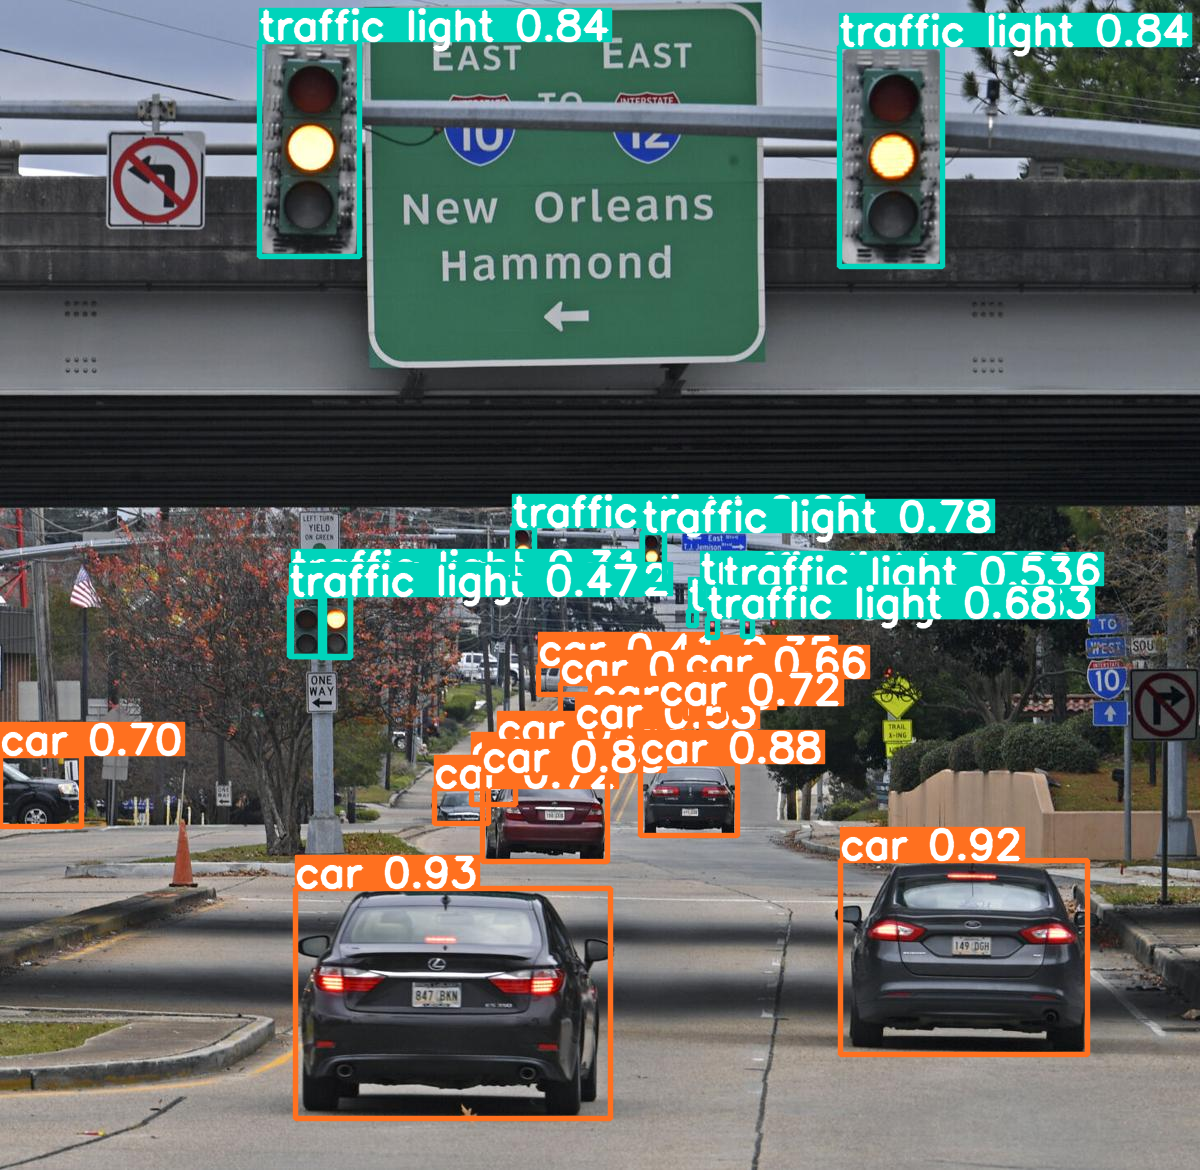

In [8]:
img_base64

In [9]:
crops = results.crop(save=True)  # cropped detections dictionary

Saved 1 image to runs/detect/exp2
Saved results to runs/detect/exp2



In [10]:
no_of_frames = 1  # no_of_frames

In [11]:
for i in range(no_of_frames):
  print(results.pandas().xyxy[i])

          xmin        ymin         xmax         ymax  confidence  class  \
0   295.797424  888.232788   610.021545  1118.405151    0.929688      2   
1   840.517273  860.431091  1087.500000  1054.396606    0.922363      2   
2   640.086182  763.448303   737.068970   835.862122    0.879883      2   
3   482.327576  772.500061   607.112061   861.724182    0.876953      2   
4   259.913788   41.088364   359.482758   256.713348    0.844238      9   
5   839.870667   46.503235   942.025879   266.896545    0.841309      9   
6   642.349121  532.952576   664.008606   584.030151    0.783203      9   
7   659.806030  705.905212   701.508606   744.698303    0.718262      2   
8   434.482758  788.663818   488.793121   823.577637    0.715332      2   
9     0.000000  755.043152    81.788795   826.163818    0.704590      2   
10  512.715515  527.133606   534.698303   578.211182    0.687012      9   
11  707.974121  618.943970   717.025879   637.693970    0.676270      9   
12  685.991394  678.10345

In [12]:
crops_image = results.pandas().xyxy[no_of_frames-1]

In [13]:
len(crops_image)

28

In [14]:
results.pandas().xyxy[no_of_frames-1]

,xmin,ymin,xmax,ymax,confidence,class,name
0,295.797424,888.232788,610.021545,1118.405151,0.929688,2,car
1,840.517273,860.431091,1087.500000,1054.396606,0.922363,2,car
2,640.086182,763.448303,737.068970,835.862122,0.879883,2,car
3,482.327576,772.500061,607.112061,861.724182,0.876953,2,car
4,259.913788,41.088364,359.482758,256.713348,0.844238,9,traffic light
5,839.870667,46.503235,942.025879,266.896545,0.841309,9,traffic light
6,642.349121,532.952576,664.008606,584.030151,0.783203,9,traffic light
7,659.806030,705.905212,701.508606,744.698303,0.718262,2,car
8,434.482758,788.663818,488.793121,823.577637,0.715332,2,car
9,0.000000,755.043152,81.788795,826.163818,0.704590,2,car


In [15]:
results.pandas().xyxy[no_of_frames-1].sort_values('ymin')  # sorted left-right

,xmin,ymin,xmax,ymax,confidence,class,name
4,259.913788,41.088364,359.482758,256.713348,0.844238,9,traffic light
5,839.870667,46.503235,942.025879,266.896545,0.841309,9,traffic light
10,512.715515,527.133606,534.698303,578.211182,0.687012,9,traffic light
6,642.349121,532.952576,664.008606,584.030151,0.783203,9,traffic light
24,291.109924,582.090515,350.107758,656.120667,0.310791,9,traffic light
25,700.215515,584.030151,710.560364,604.073242,0.279541,9,traffic light
27,751.939636,585.323242,763.577576,605.366394,0.260986,9,traffic light
17,723.491394,588.232727,733.836182,606.982727,0.527344,9,traffic light
21,320.528015,595.021545,350.431030,657.413818,0.417969,9,traffic light
19,289.978455,596.637939,324.245697,656.120667,0.472656,9,traffic light


In [16]:
target_signal = 4

In [17]:
crops_image.iloc[target_signal,5] == 9 # Traffic light

True

In [18]:
if (crops_image.iloc[target_signal, 5] == 9): # traffic light
  x1, y1, x2, y2 = int(crops_image.iloc[target_signal,0]), int(crops_image.iloc[target_signal,1]), int(crops_image.iloc[target_signal,2]), int(crops_image.iloc[target_signal,3])
  print(x1, y1, x2, y2)
  signal1 = img[y1:y2, x1:x2]
  

259 41 359 256


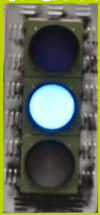

In [19]:
cv2_imshow(signal1)
#cv2.imwrite('./signal-yellow.jpg', signal1)

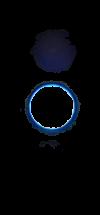

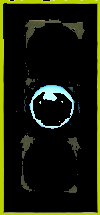

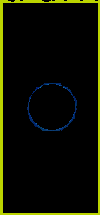

In [20]:
hsv_frame = cv2.cvtColor(signal1, cv2.COLOR_BGR2HSV)

# Red color
low_red = np.array([1, 220, 90]) # 161,155,84 
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red, high_red)
red = cv2.bitwise_and(signal1, signal1, mask=red_mask)

# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(signal1, signal1, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(signal1, signal1, mask=green_mask)

# Every color except white
low = np.array([0, 42, 0])
high = np.array([179, 255, 255])
mask = cv2.inRange(hsv_frame, low, high)
result = cv2.bitwise_and(signal1, signal1, mask=mask)

#cv2_imshow(signal1)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)
#cv2_imshow(result)

H :0  202
S :40  227
V :206  255

In [21]:
l_h, u_h = 0,202
l_s, u_s = 40, 227
l_v, u_v = 206, 255

l_yellow = np.array([l_h, l_s, l_v])
u_yellow = np.array([u_h, u_s, u_v])

In [22]:
yellow_mask = cv2.inRange(hsv_frame, l_yellow, u_yellow)
yellow = cv2.bitwise_and(signal1, signal1, mask=yellow_mask)

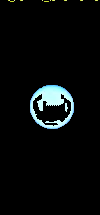

In [23]:
cv2_imshow(yellow)

In [24]:
blur = cv2.medianBlur(yellow,15)

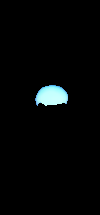

In [25]:
cv2_imshow(blur)

In [26]:
kernel = np.ones((12,12),np.uint8)

In [27]:
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

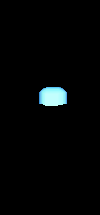

In [28]:
cv2_imshow(shaved)